In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data/amazon_reviews.csv")
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [3]:
df.shape


(4915, 12)

In [4]:
df.columns


Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')

In [5]:
df_work = df[["reviewText", "overall", "summary"]].copy()
df_work.head()



,reviewText,overall,summary
0,No issues.,4.0,Four Stars
1,"Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!
2,it works as expected. I should have sprung for...,4.0,nothing to really say....
3,This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE
4,"Bought it with Retail Packaging, arrived legit...",5.0,best deal around


In [6]:
df_work.rename(columns={
    "reviewText": "review_text",
    "overall": "rating",
    "summary": "summary_text"
}, inplace=True)

df_work.head()


,review_text,rating,summary_text
0,No issues.,4.0,Four Stars
1,"Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!
2,it works as expected. I should have sprung for...,4.0,nothing to really say....
3,This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE
4,"Bought it with Retail Packaging, arrived legit...",5.0,best deal around


In [7]:
df_work.isnull().sum()



review_text     1
rating          0
summary_text    0
dtype: int64

In [8]:
df_work = df_work.dropna(subset=["review_text"])
df_work.reset_index(drop=True, inplace=True)


In [9]:
df_work["review_text"] = df_work["review_text"].astype(str)
df_work["text_length"] = df_work["review_text"].apply(lambda x: len(x.split()))

df_work["text_length"].describe()


count    4914.000000
mean       50.452584
std        59.116494
min         1.000000
25%        23.000000
50%        33.000000
75%        55.000000
max      1554.000000
Name: text_length, dtype: float64

In [10]:
import re
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(
        word for word in text.split()
        if word not in stop_words
    )
    return text


In [12]:
df_work["clean_review"] = df_work["review_text"].apply(clean_text)

df_work[["review_text", "clean_review"]].head()


,review_text,clean_review
0,No issues.,issues
1,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...
3,This think has worked out great.Had a diff. br...,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",bought retail packaging arrived legit orange e...


In [13]:
df_work["clean_length"] = df_work["clean_review"].apply(lambda x: len(x.split()))
df_work[["text_length", "clean_length"]].describe()


,text_length,clean_length
count,4914.000000,4914.000000
mean,50.452584,25.388278
std,59.116494,30.216908
min,1.000000,1.000000
25%,23.000000,12.000000
50%,33.000000,17.000000
75%,55.000000,28.000000
max,1554.000000,781.000000


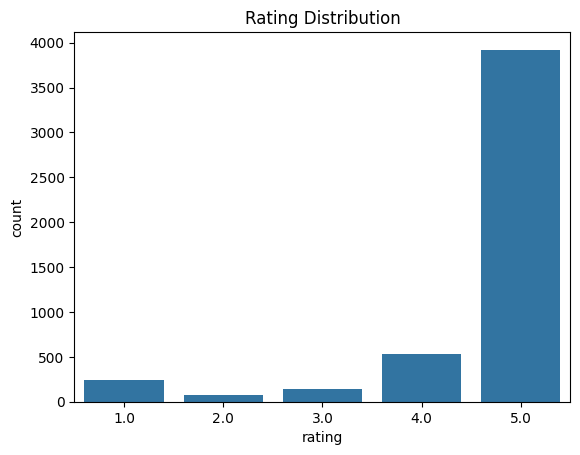

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="rating", data=df_work)
plt.title("Rating Distribution")
plt.show()


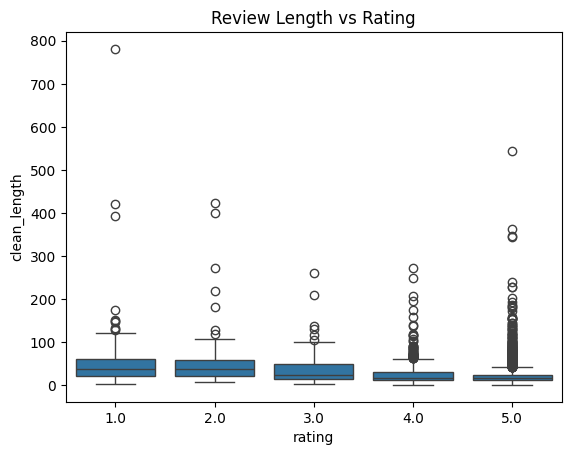

In [15]:
sns.boxplot(x="rating", y="clean_length", data=df_work)
plt.title("Review Length vs Rating")
plt.show()


In [16]:
df_work.to_csv("../data/clean_reviews.csv", index=False)


In [17]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df_work["sentiment"] = df_work["rating"].apply(rating_to_sentiment)
df_work["sentiment"].value_counts()


sentiment
positive    4448
negative     324
neutral      142
Name: count, dtype: int64

In [18]:
X = df_work["clean_review"]
y = df_work["sentiment"]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(sentiment
 positive    0.905113
 negative    0.065887
 neutral     0.029000
 Name: proportion, dtype: float64,
 sentiment
 positive    0.905392
 negative    0.066124
 neutral     0.028484
 Name: proportion, dtype: float64)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [21]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)


In [22]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape


(3931, 5000)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [24]:
clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

clf.fit(X_train_tfidf, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [25]:
y_pred = clf.predict(X_test_tfidf)


In [26]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.61      0.71      0.66        65
     neutral       0.17      0.14      0.15        28
    positive       0.96      0.96      0.96       890

    accuracy                           0.92       983
   macro avg       0.58      0.60      0.59       983
weighted avg       0.92      0.92      0.92       983



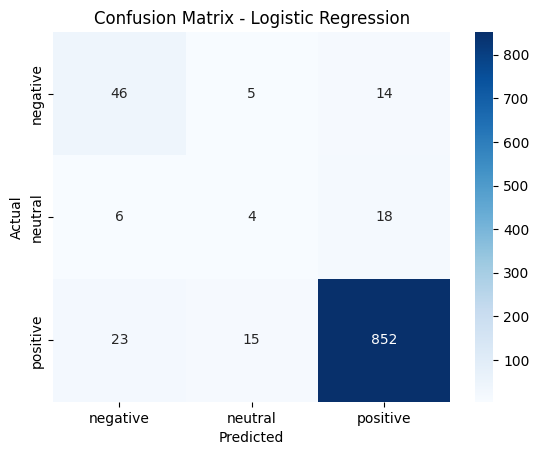

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [28]:
baseline_results = {
    "model": "Logistic Regression (TF-IDF)",
    "accuracy": 0.92,
    "macro_f1": 0.59,
    "notes": "Strong positive/negative, weak neutral"
}

baseline_results


{'model': 'Logistic Regression (TF-IDF)',
 'accuracy': 0.92,
 'macro_f1': 0.59,
 'notes': 'Strong positive/negative, weak neutral'}

In [29]:
from sklearn.naive_bayes import MultinomialNB


In [30]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [31]:
y_pred_nb = nb_clf.predict(X_test_tfidf)


In [32]:
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        65
     neutral       0.00      0.00      0.00        28
    positive       0.91      1.00      0.95       890

    accuracy                           0.91       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.82      0.91      0.86       983



c:\Users\aryan\customer-feedback-ai\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aryan\customer-feedback-ai\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aryan\customer-feedback-ai\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [33]:
comparison_results = [
    {
        "model": "Logistic Regression (TF-IDF)",
        "accuracy": 0.92,
        "macro_f1": 0.59,
        "negative_f1": 0.66,
        "neutral_f1": 0.15
    },
    {
        "model": "Naive Bayes (TF-IDF)",
        "accuracy": 0.91,
        "macro_f1": 0.32,
        "negative_f1": 0.00,
        "neutral_f1": 0.00
    }
]

comparison_results


[{'model': 'Logistic Regression (TF-IDF)',
  'accuracy': 0.92,
  'macro_f1': 0.59,
  'negative_f1': 0.66,
  'neutral_f1': 0.15},
 {'model': 'Naive Bayes (TF-IDF)',
  'accuracy': 0.91,
  'macro_f1': 0.32,
  'negative_f1': 0.0,
  'neutral_f1': 0.0}]

In [34]:
def sentiment_prompt(review):
    return f"""
You are a sentiment analysis expert.

Classify the sentiment of the following customer review as one of:
- positive
- neutral
- negative

Return ONLY the sentiment label.

Review:
\"\"\"{review}\"\"\"
"""


In [35]:
def llm_sentiment_classifier(review):
    """
    Placeholder for LLM API call.
    Replace body with actual LLM response.
    """
    prompt = sentiment_prompt(review)
    return prompt


In [36]:
sample_df = df_work.sample(20, random_state=42)[
    ["review_text", "sentiment"]
].reset_index(drop=True)

sample_df


,review_text,sentiment
0,This super-speed card works great in my phone....,positive
1,I purchased this product knowing there might b...,negative
2,Bought this to use with my Samsung HMX W300. W...,positive
3,This was an inexpensive way to get my Galaxy N...,positive
4,Purchased two 32 GBcards for the two new Sams...,positive
5,Bought this for my S3 and loaded it with 4 sea...,positive
6,good scan disk but the wrong one for my camera...,positive
7,Just received this today. Removed it from the ...,positive
8,What more can I say?I'm using it to double the...,positive
9,"Works as advertised, no issues to date. There...",positive


In [38]:
from transformers import pipeline


c:\Users\aryan\customer-feedback-ai\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
zero_shot_classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli"
)


c:\Users\aryan\customer-feedback-ai\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aryan\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regula

In [40]:
candidate_labels = ["positive", "neutral", "negative"]

def hf_llm_sentiment(review):
    result = zero_shot_classifier(
        review,
        candidate_labels=candidate_labels
    )
    return result["labels"][0]


In [41]:
hf_llm_sentiment(sample_df.loc[0, "review_text"])


'positive'

In [42]:
sample_df["llm_sentiment"] = sample_df["review_text"].apply(hf_llm_sentiment)
sample_df


,review_text,sentiment,llm_sentiment
0,This super-speed card works great in my phone....,positive,positive
1,I purchased this product knowing there might b...,negative,negative
2,Bought this to use with my Samsung HMX W300. W...,positive,positive
3,This was an inexpensive way to get my Galaxy N...,positive,positive
4,Purchased two 32 GBcards for the two new Sams...,positive,positive
5,Bought this for my S3 and loaded it with 4 sea...,positive,negative
6,good scan disk but the wrong one for my camera...,positive,negative
7,Just received this today. Removed it from the ...,positive,positive
8,What more can I say?I'm using it to double the...,positive,positive
9,"Works as advertised, no issues to date. There...",positive,positive


In [43]:
pd.crosstab(
    sample_df["sentiment"],
    sample_df["llm_sentiment"],
    rownames=["True Sentiment"],
    colnames=["LLM Prediction"]
)


LLM Prediction,negative,neutral,positive
True Sentiment,,,
negative,3,0,0
positive,2,1,14


In [44]:
(sample_df["sentiment"] == sample_df["llm_sentiment"]).mean()


np.float64(0.85)

In [45]:
final_comparison = {
    "Classical ML": {
        "model": "TF-IDF + Logistic Regression",
        "strengths": "Fast, cheap, strong on dominant class",
        "weaknesses": "Struggles with neutral and subtle sentiment"
    },
    "LLM (Free)": {
        "model": "Zero-shot BART MNLI",
        "strengths": "Better semantic understanding, neutral handling",
        "weaknesses": "Slower, higher compute cost"
    }
}

final_comparison


{'Classical ML': {'model': 'TF-IDF + Logistic Regression',
  'strengths': 'Fast, cheap, strong on dominant class',
  'weaknesses': 'Struggles with neutral and subtle sentiment'},
 'LLM (Free)': {'model': 'Zero-shot BART MNLI',
  'strengths': 'Better semantic understanding, neutral handling',
  'weaknesses': 'Slower, higher compute cost'}}